In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial import distance
from scipy import spatial
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

%matplotlib inline

In [2]:
columns = ['time', 'username', 'computer', 'process_name', 'start_or_stop']
df = pd.read_csv("C:\\Users\\kim\\data\\proc.txt", nrows=50000)
df.columns=columns

In [3]:
copy_df = df
del copy_df['time']
del copy_df['computer']
del copy_df['start_or_stop']
for x in copy_df.process_name.unique():
    copy_df[x]=(copy_df.process_name==x).astype(int)
del copy_df['process_name']
final_matrix = copy_df.groupby(['username']).max()
final_matrix.head()

,P4,P3,P16,P37,P5,P8,P96,P7,P11,P47,...,P333,P312,P174,P323,P315,P319,P320,P270,P330,P339
username,,,,,,,,,,,,,,,,,,,,,
C1$@DOM1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C10$@DOM1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
C100$@DOM1,1,1,1,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C1000$@DOM1,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C1001$@DOM1,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


These are the different distance measures

In [4]:
def get_minkowski_distance(user, df):
    result_df = pd.DataFrame(columns=['username','compared_user','minkowski_distance'])
    mylist = []
    for i in df.index:
        minkowski_distance = distance.minkowski(df.loc[user], final_matrix.loc[i], 5)
        mylist.append([user, i, minkowski_distance])
    result_df = pd.DataFrame(mylist, columns=['username','compared_user','minkowski_distance'])
    return result_df

In [5]:
user = 'C1001$@DOM1'
result_df = get_minkowski_distance(user, final_matrix)

# There is likely a more pandorable way to do this, so if anyone out there is reading it, feel free to let me know!
temp_copy = result_df.copy()
temp_copy.set_index('compared_user', inplace=True)
final_matrix = pd.merge(final_matrix, temp_copy, right_index=True, left_index=True, how='outer')
del final_matrix['username']
final_matrix.head()

,P4,P3,P16,P37,P5,P8,P96,P7,P11,P47,...,P312,P174,P323,P315,P319,P320,P270,P330,P339,minkowski_distance
username,,,,,,,,,,,,,,,,,,,,,
C1$@DOM1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.430969
C10$@DOM1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1.584893
C100$@DOM1,1,1,1,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1.319508
C1000$@DOM1,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.148698
C1001$@DOM1,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000


      username compared_user  minkowski_distance
0  C1001$@DOM1      C1$@DOM1            1.430969
1  C1001$@DOM1     C10$@DOM1            1.584893
2  C1001$@DOM1    C100$@DOM1            1.319508
3  C1001$@DOM1   C1000$@DOM1            1.148698
4  C1001$@DOM1   C1001$@DOM1            0.000000


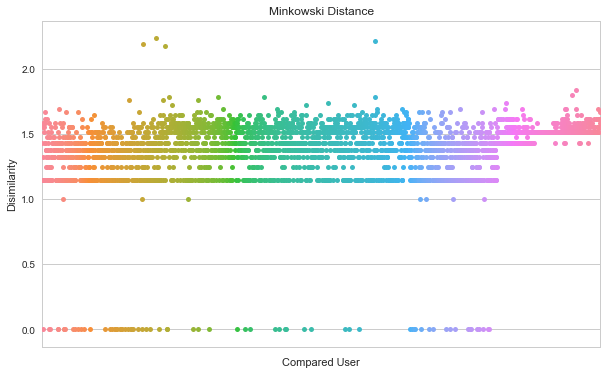

In [6]:
print(result_df.head())

plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')
g = sns.swarmplot(x='compared_user', y ='minkowski_distance', data = result_df)
g.set_xticklabels([])
plt.title('Minkowski Distance')
plt.xlabel('Compared User')
plt.ylabel('Disimilarity')

In [8]:
df = result_df.sort_values(['minkowski_distance'], ascending=False)
print(df.head(5))

         username compared_user  minkowski_distance
611   C1001$@DOM1   C1570$@DOM1            2.236854
1795  C1001$@DOM1    C466$@DOM1            2.212357
544   C1001$@DOM1   C1503$@DOM1            2.186724
663   C1001$@DOM1   C1641$@DOM1            2.177906
2879  C1001$@DOM1     U318@DOM1            1.838416


Minkowski Distance: The distance defined as Euclidean or Manhattan for lower values of p, for higher values of p, the equation is exponential, so large distances become even larger.  This is useful for determining outliers, or placing emphasis on large distances to make these easier to identify.

In [9]:
# Because we are using the scipy version/library for cosine distance
# We don't need to usee 1 - ...  If you read the documentation, it's already in there (1 - cosine_distance)
def get_cosine_distance(user, df):
    result_df = pd.DataFrame(columns=['username','compared_user', 'cosine_distance'])
    mylist = []
    for i in df.index:
        cosine_distance = spatial.distance.cosine(df.loc[user], final_matrix.loc[i])
        mylist.append([user, i, cosine_distance])
    result_df = pd.DataFrame(mylist, columns=['username','compared_user','cosine_distance'])
    return result_df

In [10]:
result_df = get_cosine_distance(user, final_matrix)
temp_copy = result_df.copy()
temp_copy.set_index('compared_user', inplace=True)
final_matrix = pd.merge(final_matrix, temp_copy, right_index=True, left_index=True, how='outer')
del final_matrix['username']
final_matrix.head()

,P4,P3,P16,P37,P5,P8,P96,P7,P11,P47,...,P174,P323,P315,P319,P320,P270,P330,P339,minkowski_distance,cosine_distance
username,,,,,,,,,,,,,,,,,,,,,
C1$@DOM1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1.430969,7.834955e-01
C10$@DOM1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1.584893,1.000000e+00
C100$@DOM1,1,1,1,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1.319508,2.587827e-01
C1000$@DOM1,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1.148698,2.482398e-01
C1001$@DOM1,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.000000,1.110223e-16


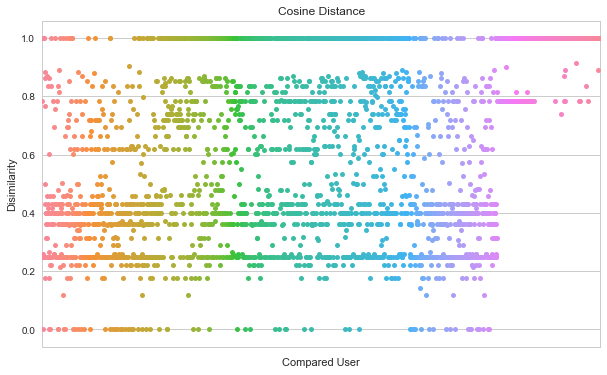

In [12]:
plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')
g = sns.swarmplot(x='compared_user', y ='cosine_distance', data = result_df)
g.set_xticklabels([])
plt.title('Cosine Distance')
plt.xlabel('Compared User')
plt.ylabel('Disimilarity')

Cosine Similarily measures the cosine of the angle of two vectors.  The larger the angle, the further apart two users are.  The smaller the angle, the closer the two users are.

In [14]:
df = result_df.sort_values(['cosine_distance'], ascending=True)
print(df.head(5))

         username compared_user  cosine_distance
1709  C1001$@DOM1    C415$@DOM1     1.110223e-16
2222  C1001$@DOM1    C789$@DOM1     1.110223e-16
223   C1001$@DOM1   C1210$@DOM1     1.110223e-16
630   C1001$@DOM1   C1589$@DOM1     1.110223e-16
1994  C1001$@DOM1    C580$@DOM1     1.110223e-16


In [15]:
def get_jaccard_distance(user, df):
    result_df = pd.DataFrame(columns=['username','compared_user', 'jaccard_distance'])
    mylist = []
    for i in df.index:
        intersection = 0
        union = 0
        jaccard_distance = 0
        
        user_series = df.loc[user]
        final_series = final_matrix.loc[i]
        for index_val, series_val in user_series.iteritems():
            if user_series[index_val] and final_series[index_val]:
                intersection+=1
            if user_series[index_val] or final_series[index_val]:
                union+=1
        jaccard_distance = 1 - (intersection/union)
        
        mylist.append([user, i, jaccard_distance])
    result_df = pd.DataFrame(mylist, columns=['username','compared_user','jaccard_distance'])
    return result_df

In [16]:
result_df = get_jaccard_distance(user, final_matrix)
temp_copy = result_df.copy()
temp_copy.set_index('compared_user', inplace=True)
final_matrix = pd.merge(final_matrix, temp_copy, right_index=True, left_index=True, how='outer')
del final_matrix['username']
final_matrix.head()

,P4,P3,P16,P37,P5,P8,P96,P7,P11,P47,...,P323,P315,P319,P320,P270,P330,P339,minkowski_distance,cosine_distance,jaccard_distance
username,,,,,,,,,,,,,,,,,,,,,
C1$@DOM1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1.430969,7.834955e-01,0.777778
C10$@DOM1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1.584893,1.000000e+00,0.916667
C100$@DOM1,1,1,1,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,1.319508,2.587827e-01,0.384615
C1000$@DOM1,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1.148698,2.482398e-01,0.333333
C1001$@DOM1,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.000000,1.110223e-16,0.000000


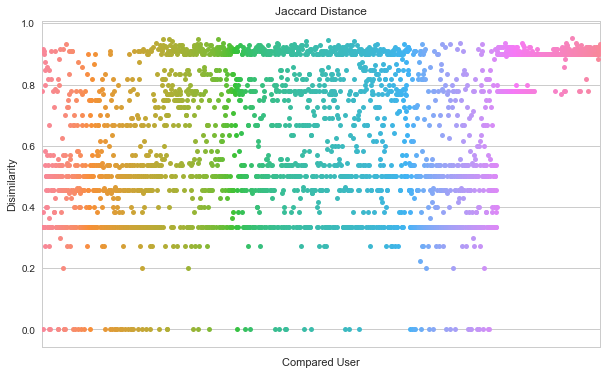

In [17]:
plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')
g = sns.swarmplot(x='compared_user', y ='jaccard_distance', data = result_df)
g.set_xticklabels([])
plt.title('Jaccard Distance')
plt.xlabel('Compared User')
plt.ylabel('Disimilarity')

In [19]:
df = result_df.sort_values(['jaccard_distance'], ascending=False)
df.head()

,username,compared_user,jaccard_distance
2855,C1001$@DOM1,U24@DOM1,0.952381
685,C1001$@DOM1,C1665$@DOM1,0.950000
946,C1001$@DOM1,C2148$@DOM1,0.950000
652,C1001$@DOM1,C1624$@DOM1,0.947368
839,C1001$@DOM1,C1893$@DOM1,0.947368


The Jaccard Distance is a ratio of the intersection and union of the data.  This resulted in a similar graph as the Cosine Distance.

In [20]:
import scipy as sp

def get_mahalanobis_distance(user, df):
    result_df = pd.DataFrame(columns=['username','compared_user', 'mahalanobis_distance'])
    mylist = []
    for i in df.index:
        covariance = df.cov()
        inv_covariance = sp.linalg.inv(covariance)
        mahalanobis_distance = spatial.distance.mahalanobis(df.loc[user], final_matrix.loc[i], inv_covariance)
        mylist.append([user, i, mahalanobis_distance])
    result_df = pd.DataFrame(mylist, columns=['username','compared_user','mahalanobis_distance'])
    return result_df

In [21]:
mu, sigma = 0, 0.01
noise = np.random.normal(mu, sigma, final_matrix.shape)
dirty_matrix = final_matrix + noise
result_df = get_mahalanobis_distance(user, dirty_matrix)

In [ ]:
Find the users that are the outliers, look at their processes, look into this visually
Look at each of the distances and see which one gives me the result I'm looking for'

Look and confirm that the distance is actually similar
Compare all of the users 
find the same users Correlate in Jaccard distance
1 sentence summary for each of the metrics

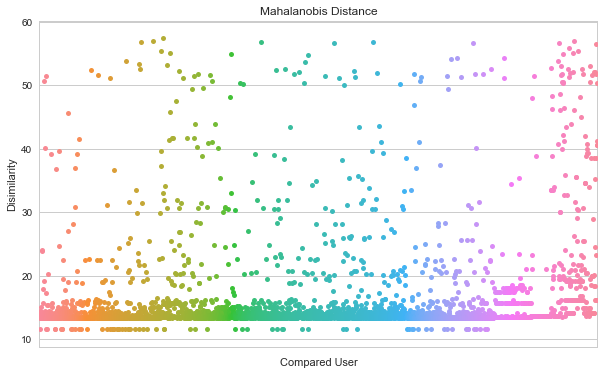

In [23]:
plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')
g = sns.swarmplot(x='compared_user', y ='mahalanobis_distance', data = result_df)
g.set_xticklabels([])
plt.title('Mahalanobis Distance')
plt.xlabel('Compared User')
plt.ylabel('Disimilarity')

Very Pretty Graph!  I loved the visual result on this one.  Mahalanobis Distance is a measure of variance of each of the distances.

In [24]:
df = result_df.sort_values(['mahalanobis_distance'], ascending=False)
print(df.head(5))

         username compared_user  mahalanobis_distance
663   C1001$@DOM1   C1641$@DOM1             57.471723
611   C1001$@DOM1   C1570$@DOM1             57.001321
2879  C1001$@DOM1     U318@DOM1             56.996738
1193  C1001$@DOM1   C2710$@DOM1             56.847254
1795  C1001$@DOM1    C466$@DOM1             56.818588


In [25]:
temp_copy = result_df.copy()
temp_copy.set_index('compared_user', inplace=True)
final_matrix = pd.merge(final_matrix, temp_copy, right_index=True, left_index=True, how='outer')
del final_matrix['username']
final_matrix.head()

,P4,P3,P16,P37,P5,P8,P96,P7,P11,P47,...,P315,P319,P320,P270,P330,P339,minkowski_distance,cosine_distance,jaccard_distance,mahalanobis_distance
username,,,,,,,,,,,,,,,,,,,,,
C1$@DOM1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1.430969,7.834955e-01,0.777778,13.580758
C10$@DOM1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1.584893,1.000000e+00,0.916667,14.069332
C100$@DOM1,1,1,1,0,1,1,1,0,0,0,...,0,0,0,0,0,0,1.319508,2.587827e-01,0.384615,14.394344
C1000$@DOM1,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1.148698,2.482398e-01,0.333333,13.287887
C1001$@DOM1,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.000000,1.110223e-16,0.000000,11.541522


In [43]:
users_100_df = final_matrix.head(100)
column_list = ['minkowski_distance', 'cosine_distance', 'jaccard_distance','mahalanobis_distance']
users_100_df = users_100_df[column_list]
users_100_df.head()

,minkowski_distance,cosine_distance,jaccard_distance,mahalanobis_distance
username,,,,
C1$@DOM1,1.430969,7.834955e-01,0.777778,13.580758
C10$@DOM1,1.584893,1.000000e+00,0.916667,14.069332
C100$@DOM1,1.319508,2.587827e-01,0.384615,14.394344
C1000$@DOM1,1.148698,2.482398e-01,0.333333,13.287887
C1001$@DOM1,0.000000,1.110223e-16,0.000000,11.541522


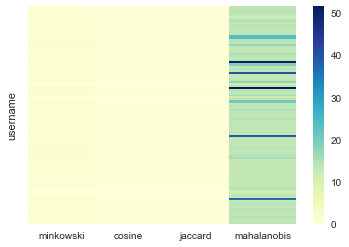

In [51]:
ax = sns.heatmap(users_100_df, cmap="YlGnBu", xticklabels=['minkowski', 'cosine', 'jaccard', 'mahalanobis'], yticklabels='')

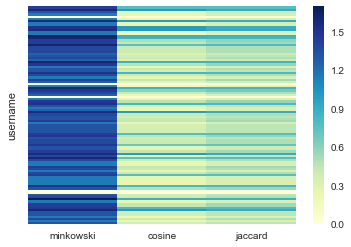

In [52]:
#Since the Mahalanobis distance really skews the graph, lets just take it off and see what it looks like
del users_100_df['mahalanobis_distance']
ax = sns.heatmap(users_100_df, cmap="YlGnBu", xticklabels=['minkowski', 'cosine', 'jaccard'], yticklabels='')


In [33]:
def get_cummulative_variance(n):
    X = final_matrix.values
    pca = PCA(n_components=n)
    pca.fit(X)

    variance = pca.explained_variance_ratio_
    cummulative_variance = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
    return cummulative_variance

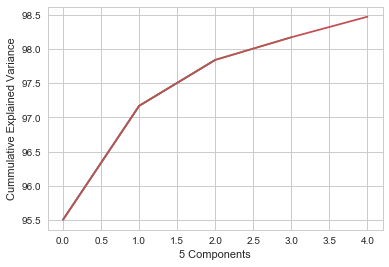

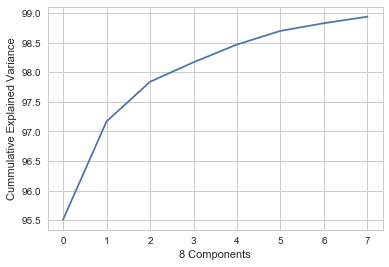

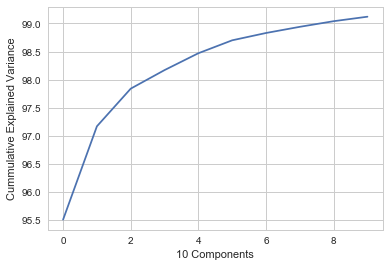

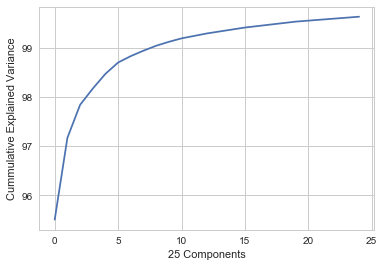

In [36]:
cummulative_variance = get_cummulative_variance(3)
plt.plot(cummulative_variance)
plt.xlabel("3 Components")
plt.ylabel("Cummulative Explained Variance")
plt.subplots_adjust(top=0.9)

cummulative_variance = get_cummulative_variance(4)
plt.plot(cummulative_variance)
plt.xlabel("4 Components")
plt.ylabel("Cummulative Explained Variance")
plt.subplots_adjust(top=0.9)

cummulative_variance = get_cummulative_variance(5)
plt.plot(cummulative_variance)
plt.xlabel("5 Components")
plt.ylabel("Cummulative Explained Variance")
plt.subplots_adjust(top=0.9)
plt.show()

cummulative_variance = get_cummulative_variance(8)
plt.plot(cummulative_variance)
plt.xlabel("8 Components")
plt.ylabel("Cummulative Explained Variance")
plt.subplots_adjust(top=0.9)
plt.show()

cummulative_variance = get_cummulative_variance(10)
plt.plot(cummulative_variance)
plt.xlabel("10 Components")
plt.ylabel("Cummulative Explained Variance")
plt.subplots_adjust(top=0.9)
plt.show()

cummulative_variance = get_cummulative_variance(25)
plt.plot(cummulative_variance)
plt.xlabel("25 Components")
plt.ylabel("Cummulative Explained Variance")
plt.subplots_adjust(top=0.9)
plt.show()

In [39]:
def rank_features(data, n_components): 
    features = data 
    feature_names = features.columns.tolist() 
    pca = PCA(n_components=n_components) 
    pca.fit(features) 
    variances = pca.explained_variance_ratio_ 
    variances = list(zip(feature_names, variances))
    df = pd.DataFrame(variances, columns=['feature', 'variance_ratio']).set_index('feature') 
    df = df.sort_values('variance_ratio', ascending=False) 
    return df

In [40]:
ranked_features = rank_features(final_matrix, 311)
ranked_features.head(25)

,variance_ratio
feature,
P4,0.955118
P3,0.016611
P16,0.006664
P37,0.003272
P5,0.003041
P8,0.002327
P96,0.001349
P7,0.001093
P11,0.000975
